In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg


In [46]:
# Define directories for training and testing data
base_dir = 'archive'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


In [47]:
# Define image dimensions and batch size
img_width, img_height = 48, 48
batch_size = 32

In [48]:
# Create ImageDataGenerator for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [49]:
# Generate training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')


Found 24176 images belonging to 5 classes.
Found 6043 images belonging to 5 classes.


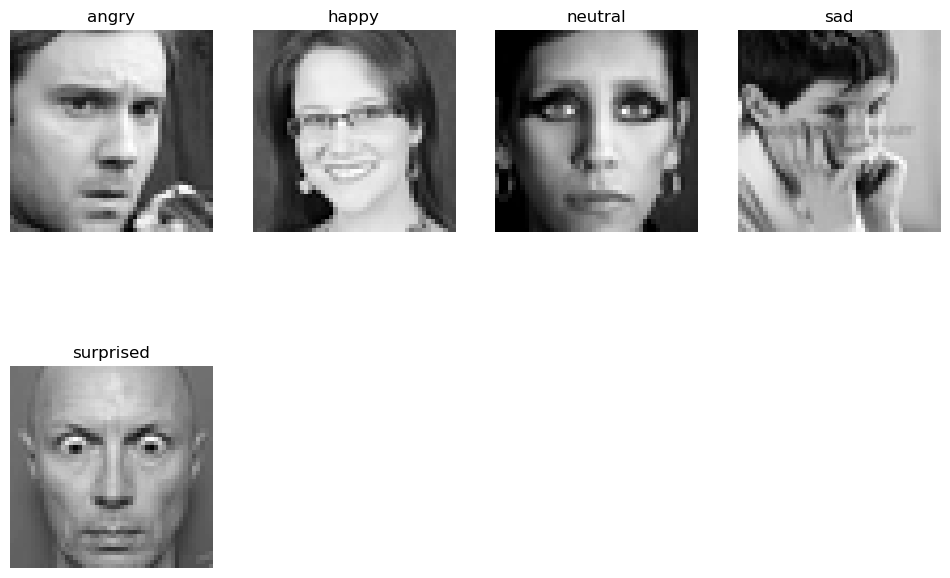

In [50]:
# Display sample images for different emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'surprised']

plt.figure(figsize=(12, 8))
for i, emotion in enumerate(emotions, start=1):
    img_path = os.path.join(train_dir, emotion, os.listdir(os.path.join(train_dir, emotion))[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

plt.show()


In [51]:
# Define the CNN model 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

C:\Users\SOUMYADEEP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [52]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [53]:
# Train the model
history = model.fit(train_generator, epochs=100, validation_data=test_generator)


Epoch 1/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.2961 - loss: 1.5779 - val_accuracy: 0.3002 - val_loss: 1.5538
Epoch 2/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 75s 98ms/step - accuracy: 0.2997 - loss: 1.5419 - val_accuracy: 0.3516 - val_loss: 1.4719
Epoch 3/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 85s 112ms/step - accuracy: 0.3273 - loss: 1.5027 - val_accuracy: 0.3887 - val_loss: 1.4148
Epoch 4/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 77s 101ms/step - accuracy: 0.3643 - loss: 1.4447 - val_accuracy: 0.4728 - val_loss: 1.2558
Epoch 5/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 79s 103ms/step - accuracy: 0.4060 - loss: 1.3846 - val_accuracy: 0.5180 - val_loss: 1.2049
Epoch 6/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 74s 97ms/step - accuracy: 0.4403 - loss: 1.3174 - val_accuracy: 0.5555 - val_loss: 1.1110
Epoch 7/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 90s 118ms/step - accuracy: 0.4721 - loss: 1.2720 - val_accuracy: 0.5671 - val_loss: 1.0782
Epoch 8/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 84s 110ms/step - accuracy: 0.5012 - 

189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6719 - loss: 0.8439
Test Loss: 0.8509771823883057
Test Accuracy: 0.6713553071022034


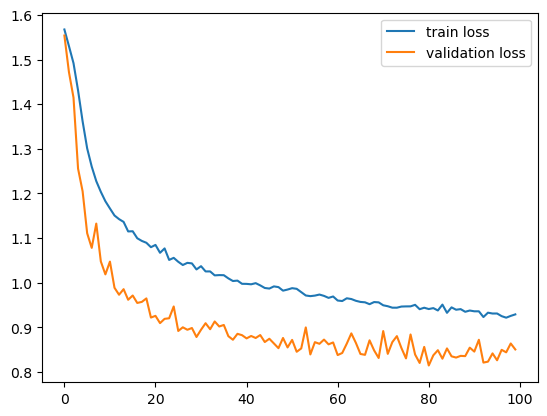

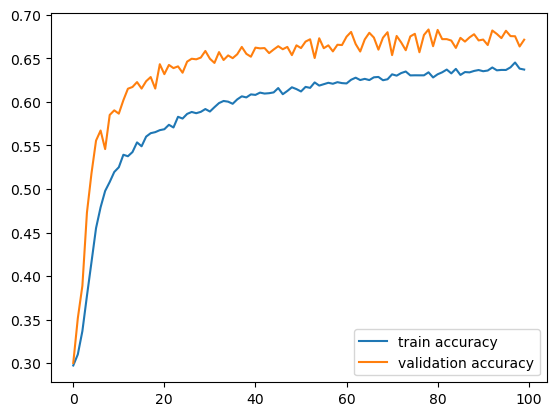

In [54]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plotting loss and accuracy
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


In [55]:
def predict_emotion(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    emotion_labels = ['angry', 'happy', 'neutral', 'sad', 'surprised']
    predicted_class = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_class]
    return predicted_emotion


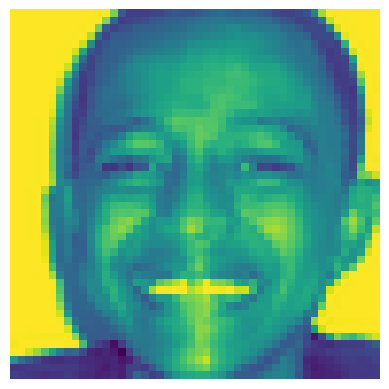

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Predicted Emotion: angry


In [56]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/happy/im17.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/happy/im17.png')
print("Predicted Emotion:", prediction)

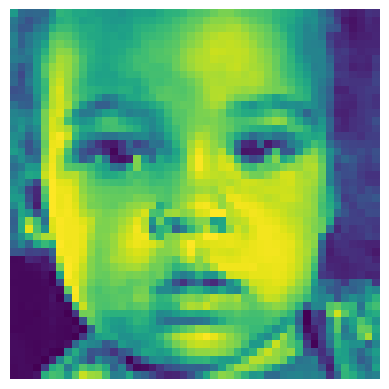

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Emotion: angry


In [57]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/neutral/im292.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/neutral/im292.png')
print("Predicted Emotion:", prediction)

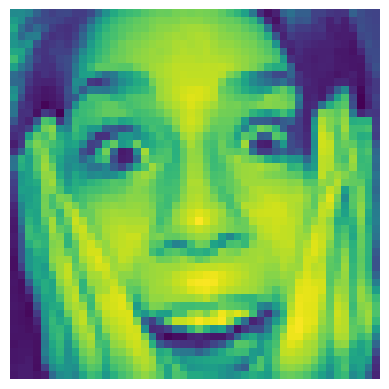

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Emotion: surprised


In [58]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/surprised/im141.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/surprised/im141.png')
print("Predicted Emotion:", prediction)

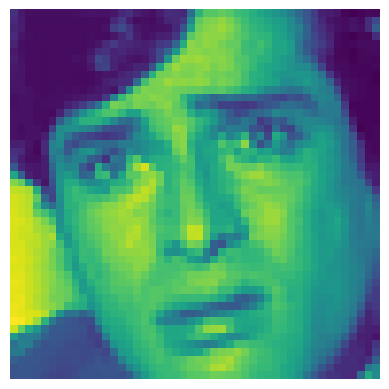

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Emotion: surprised


In [59]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/sad/im1060.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/sad/im1060.png')
print("Predicted Emotion:", prediction)

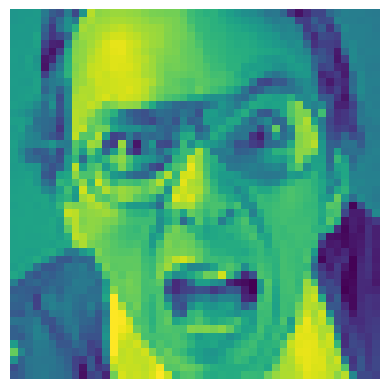

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Emotion: angry


In [60]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/angry/im204.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/angry/im204.png')
print("Predicted Emotion:", prediction)